In [162]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [163]:
IMAGE_WIDTH = 224    
IMAGE_HEIGHT = 224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

datapath = '../datasets/garbage_classification/'
classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash', 'biological']

In [164]:
data = []

for c in classes:
  path = os.path.join(datapath, c)
  idx = classes.index(c)
  for file in os.listdir(path):
    image = cv2.imread(os.path.join(path, file))
    image = cv2.resize(image, IMAGE_SIZE)
    data.append([image, idx])

In [165]:
random.shuffle(data)

In [167]:
X = []
Y = []
for x, y in data:
  X.append(x)
  Y.append(y)

In [168]:
x = np.array(X)
y = np.array(Y)
print(x.shape, y.shape)

(3512, 224, 224, 3) (3512,)


In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4, stratify=y)

In [170]:
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2809, 224, 224, 3) (2809,)
(703, 224, 224, 3) (703,)


In [171]:
model = tf.keras.applications.mobilenet_v2.MobileNetV2(
  input_shape=None,
  alpha=1.0,
  include_top=True,
  weights='imagenet',
  input_tensor=None,
  pooling=None,
  classes=1000,
  classifier_activation='softmax'
)

In [172]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [173]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [174]:
final_output = layers.Dense(128)(base_output) 
final_output = layers.Activation('relu')(final_output) 
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output) 

In [175]:
new_model = tf.keras.Model(inputs = base_input, outputs = final_output)
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

In [176]:
history = new_model.fit(x_train, y_train, epochs = 30, validation_data=(x_test, y_test))

Epoch 1/30
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000025DB8100D30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000025DB8100D30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

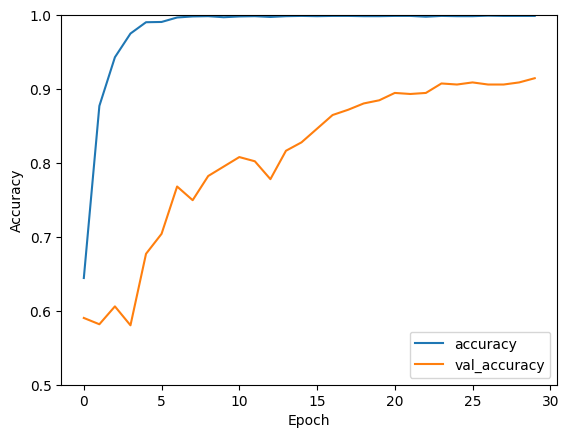

In [178]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

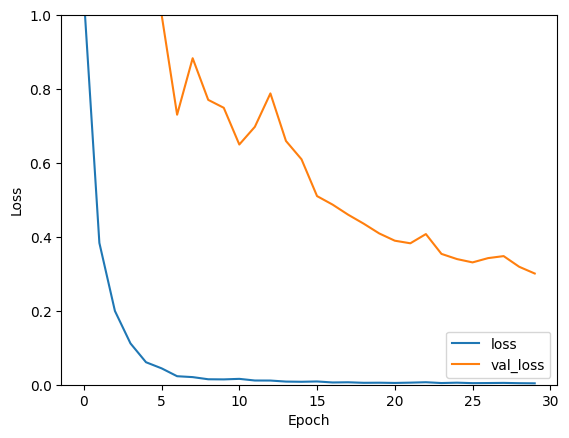

In [180]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [181]:
predict = new_model.predict(x_test)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000025DB523FB50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x0000025DB523FB50>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

In [184]:
x1 = []
for i in range(len(predict)):
    x1.insert(i, np.argmax(predict[i]))

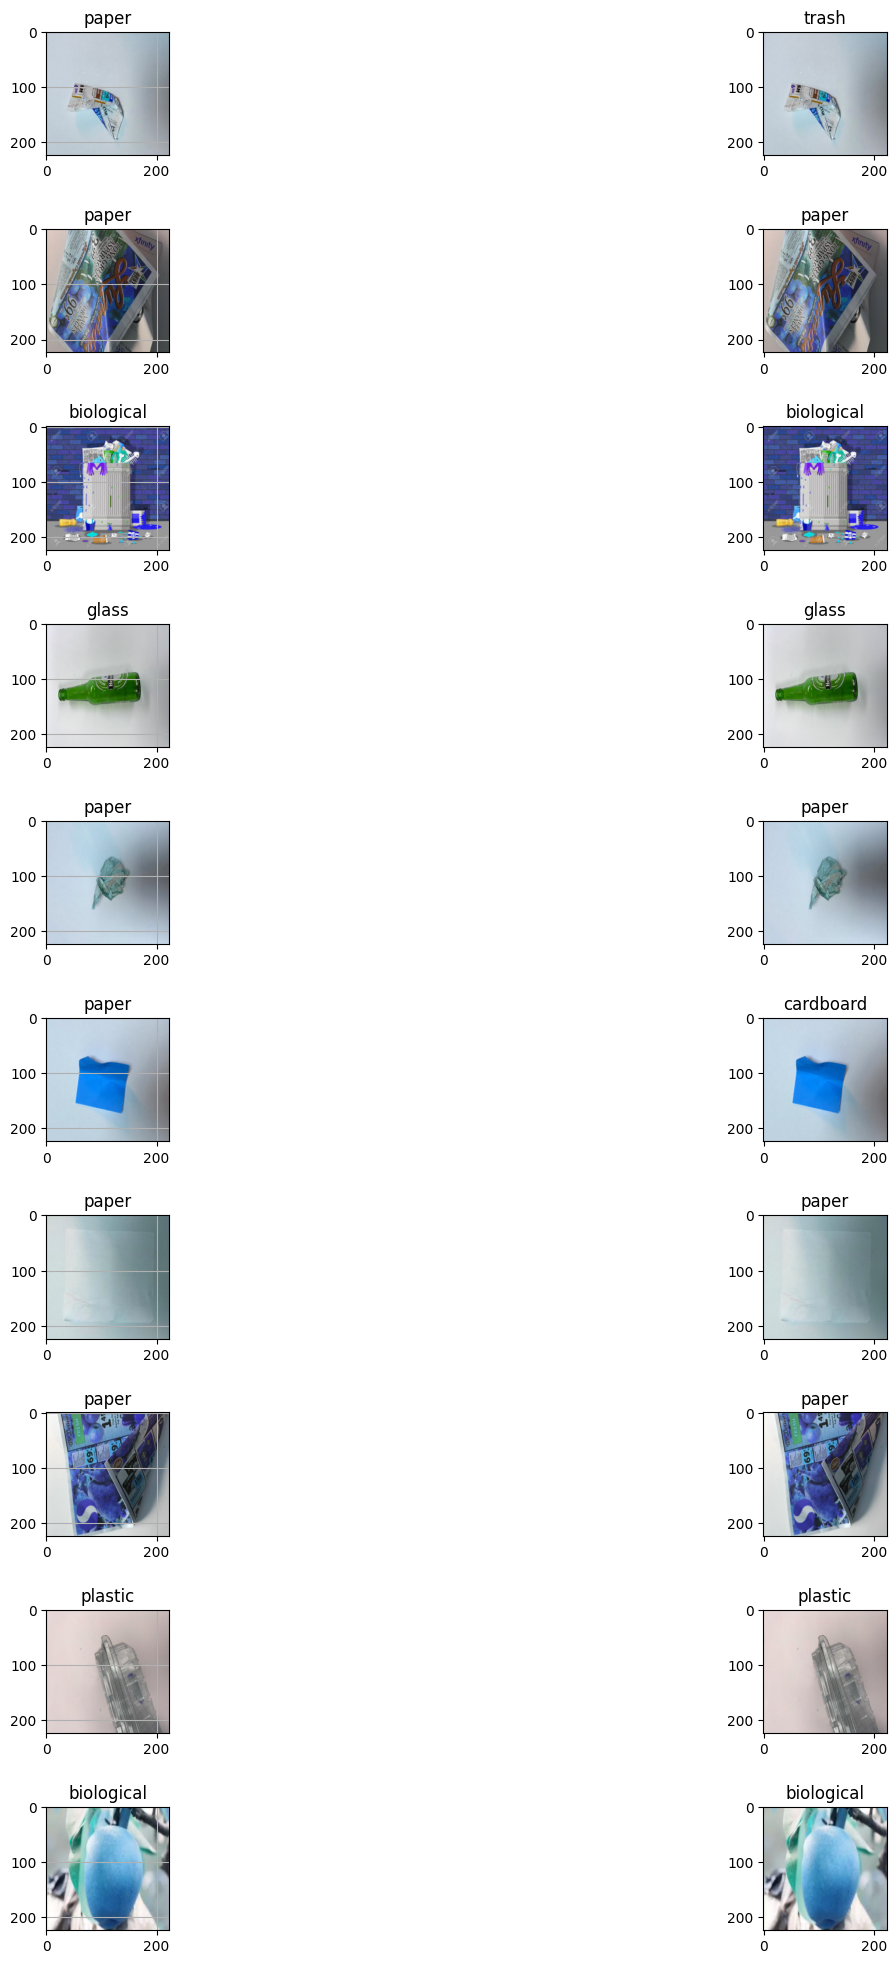

In [213]:
f, ax = plt.subplots(10, 2, figsize=(20, 20))
a = 0
b = 1

for i in range(10):
    ax[i,a].imshow(x_test[i])
    ax[i,a].set_title(classes[y_test[i]])
    ax[i,b].imshow(x_test[i])
    ax[i,b].set_title(classes[x1[i]])
    ax[i,a].grid(True)
    ax[i,a].grid(True)

f.tight_layout(pad=2.0)
plt.show()

In [190]:
def preprocess(path):
  image = cv2.imread(path)
  image = cv2.resize(image, IMAGE_SIZE)
  image = np.array(image)
  image = image / 255.0
  return image

In [207]:
new_model.save('garbage_classification.h5')

In [2]:
model = tf.keras.models.load_model('garbage_classification.h5')
model.summary()
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

NameError: name 'tf' is not defined

In [1]:
for i in range(9):
  image = preprocess(f'../datasets/google_img_test/test{i}.jpg')
  test_pred = model.predict(np.array([image]))
  print(test_pred)
  print(classes[np.argmax(test_pred[0])])

NameError: name 'preprocess' is not defined